In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']

In [16]:
dd=pd.read_csv(open('./PM25city.csv',encoding='utf-8'))
data=dd[dd.AQI>0]
data=dd[dd.PM25>0]
citydict={}
aqidict={}
aqilist=[]
for index, row in data.iterrows():
    AQI=row['AQI']
    year=row['year']
    month=row['month']
    day=row['day']
    date=str(year) + str(month) + str(day)
    city=row['city']
    if (citydict.get(city)):
        aqidict=citydict.get(city)
        if (aqidict.get(date)):
            aqilist = aqidict.get(date)
            aqilist.append(AQI)
        else:
            aqilist = []
            aqilist.append(AQI)
            aqidict[date] = aqilist

    else:
        if (aqidict.get(date)):
            aqilist = aqidict.get(date)
            aqilist.append(AQI)
        else:
            aqidict={}
            aqilist = []
            aqilist.append(AQI)
            aqidict[date] = aqilist
            citydict[city] = aqidict


In [17]:
data.head()

,站号,经度,纬度,PM25,PM10,NO2,SO2,O3-1,O3-8h,CO,AQI,等级,year,month,day,hour,city
0,99000,115.49,38.88,43,68,21,20,104,104,0.6,60,2,2018,8,1,0,北京
1,99001,115.51,38.88,38,58,26,20,120,120,0.6,54,2,2018,8,1,0,北京
2,99002,115.47,38.91,50,72,22,17,113,113,0.7,69,2,2018,8,1,0,北京
3,99004,115.45,38.88,52,108,46,21,66,66,0.7,79,2,2018,8,1,0,北京
4,99006,116.36,39.87,55,80,27,2,60,60,1.3,75,2,2018,8,1,0,北京


In [79]:
data.describe()

,站号,经度,纬度,PM25,PM10,NO2,SO2,O3-1,O3-8h,CO,AQI,等级,year,month,day,hour
count,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000,397945.000000
mean,98517.503019,114.080649,34.536736,58.796015,93.759663,38.165910,13.288854,54.663818,52.679021,1.057987,87.572677,2.200390,2018.749626,3.253545,14.738607,11.686786
std,2013.423857,7.444109,5.322349,57.214080,76.637585,27.291012,13.750498,44.923098,40.485576,0.740253,66.738264,1.218403,0.433229,2.896522,8.634541,6.937073
min,92010.000000,87.460000,19.880000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,1.000000,0.000000
25%,98537.000000,112.840000,31.220000,20.000000,40.000000,16.000000,5.000000,20.000000,22.000000,0.600000,43.000000,1.000000,2018.000000,1.000000,8.000000,6.000000
50%,99222.000000,116.690000,35.490000,39.000000,71.000000,31.000000,9.000000,48.000000,46.000000,0.900000,66.000000,2.000000,2019.000000,2.000000,14.000000,12.000000
75%,99574.000000,118.660000,39.130000,78.000000,122.000000,55.000000,16.000000,74.000000,70.000000,1.300000,109.000000,3.000000,2019.000000,8.000000,22.000000,18.000000
max,99997.000000,121.700000,44.360000,589.000000,1384.000000,339.000000,489.000000,642.000000,300.000000,14.300000,500.000000,6.000000,2019.000000,8.000000,31.000000,23.000000


In [77]:
data.city.value_counts()

天津      55354
上海      55345
郑州      54264
成都      41137
青岛      39272
北京      37613
济南      37566
厦门      22293
昆明      17181
乌鲁木齐    14808
呼和浩特    13719
海口       9393
Name: city, dtype: int64

for (city,aqidict) in citydict.items():
       for (date,aqilist) in aqidict.items():
            sum=0
            count=0
            for i in range(0,len(aqilist)):
                count=count+1
                sum+=aqilist[i]
            aqilist.append(sum/count)

In [21]:
result=pd.read_csv(open('./result.csv',encoding='utf-8'),header=None)
result.columns = ['city','date','AQI']
result['date'] = result['date'].apply(str)

In [19]:
result.head()#12个城市每天的平均AQI

,city,date,AQI
0,北京,20180801,91.868217
1,北京,20180802,103.557604
2,北京,20180803,82.120388
3,北京,20180804,96.929577
4,北京,20180805,55.000000


In [24]:
handle=pd.read_csv(open('./handle.csv',encoding='utf-8'))

In [25]:
handle.head()#12个城市每月的空气质量等级天数

,city,month,aqilist
0,北京,201808,"[12, 17, 0, 0, 0, 1]"
1,北京,201901,"[6, 15, 0, 0, 0, 10]"
2,北京,201902,"[6, 11, 0, 0, 0, 11]"
3,北京,201906,"[1, 2, 0, 0, 0, 0]"
4,上海,201808,"[26, 4, 0, 0, 0, 0]"


In [26]:
pie=pd.read_csv(open('./pie.csv',encoding='utf-8',),header=None)
pie.columns = ['city','Excellent','Good','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted']

In [27]:
pie.head()#12个城市总的空气质量的天数统计

,city,Excellent,Good,Lightly Polluted,Moderately Polluted,Heavily Polluted,Severely Polluted
0,北京,25,45,0,0,0,22
1,上海,49,28,0,0,0,15
2,天津,19,51,0,0,0,22
3,青岛,33,29,0,0,0,30
4,济南,7,44,0,0,0,41


E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


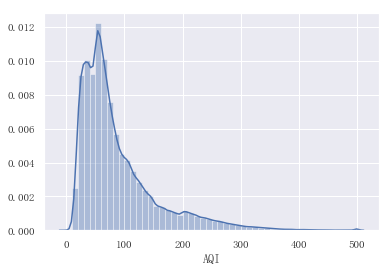

In [83]:
sns.distplot(data["AQI"])

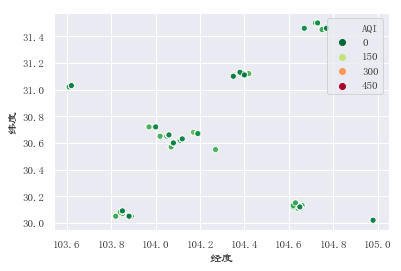

In [84]:
sns.scatterplot(x='经度', y='纬度', hue='AQI', palette=plt.cm.RdYlGn_r, data=data[data['city']=='成都'])

<Figure size 864x864 with 0 Axes>

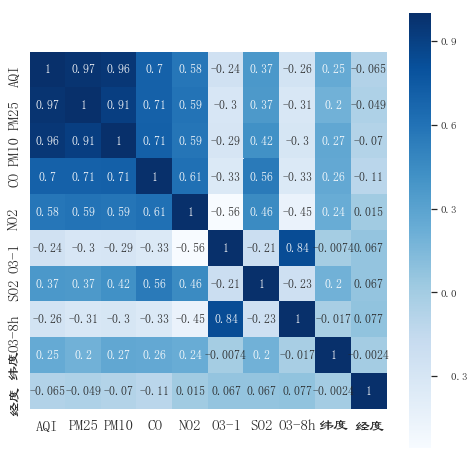

In [85]:
corrdata=data[['AQI','PM25','PM10','CO','NO2','O3-1','SO2','O3-8h','纬度','经度']]
corr=corrdata.corr()
plt.figure(figsize=(12,12))
# 绘制相关系数热力图
plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set(font='LiSu')
plt.show()

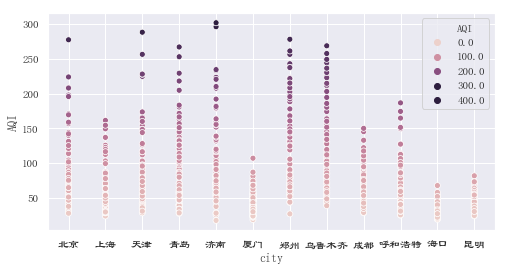

In [89]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="city", y="AQI",hue="AQI", data=result)

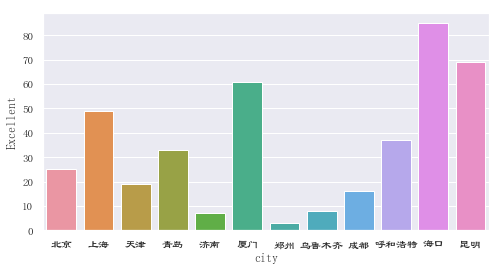

In [98]:
plt.figure(figsize=(8,4))
sns.barplot(x="city", y="Excellent", data=pie)

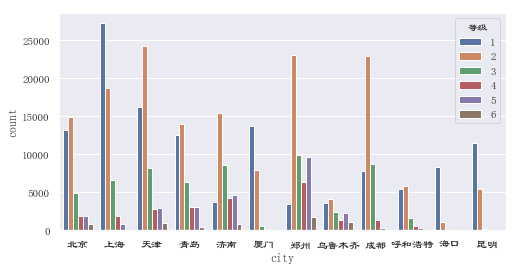

In [91]:
plt.figure(figsize=(8,4))
sns.countplot(x='city',hue='等级',data=data)

In [99]:
pie.values.tolist()[0][1:]

[25, 45, 0, 0, 0, 22]

([<matplotlib.patches.Wedge at 0x27137ec5208>,
 [Text(0.939861,0.571542,'Excellent'),
  Text(-1.09423,0.112491,'Good'),
  Text(0.296776,-1.05921,'Lightly Polluted'),
  Text(0.296776,-1.05921,'Moderately Polluted'),
  Text(0.296776,-1.05921,'Heavily Polluted'),
  Text(0.876486,-0.66466,'Severely Polluted')],
 [Text(0.512652,0.31175,'17.39%'),
  Text(-0.596854,0.0613585,'61.96%'),
  Text(0.161878,-0.57775,'0.00%'),
  Text(0.161878,-0.57775,'0.00%'),
  Text(0.161878,-0.57775,'0.00%'),
  Text(0.478083,-0.362542,'20.65%')])

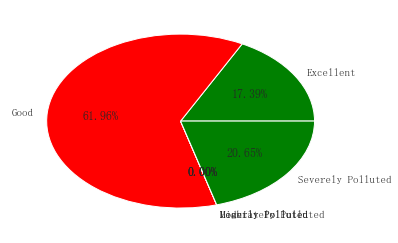

In [100]:
plt.pie(x=pie.values.tolist()[8][1:],labels=['Excellent','Good','Lightly Polluted','Moderately Polluted','Heavily Polluted','Severely Polluted'],autopct='%1.2f%%',colors=['green','red','skyblue','blue','yellow'],pctdistance=0.6)

In [3]:
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.model_selection import train_test_split

x = data.drop(['city','站号','AQI','year','month','day','hour'], axis=1) #删除city等字段
y = data['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
x_train.head()

,经度,纬度,PM25,PM10,NO2,SO2,O3-1,O3-8h,CO,等级
335186,103.97,30.72,91,152,71,12,1,2,1.4,3
277385,113.83,34.01,40,72,22,17,70,53,1.0,2
314145,87.98,44.15,14,22,4,5,91,79,0.4,1
40521,121.58,31.20,13,30,26,5,37,92,0.4,1
245476,118.98,25.47,11,20,15,4,50,48,0.8,1


In [101]:
x_train.describe()

,经度,纬度,PM25,PM10,NO2,SO2,O3-1,O3-8h,CO,等级
count,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000,318356.000000
mean,114.076025,34.538053,58.842937,93.842108,38.210692,13.297026,54.666644,52.682252,1.058265,2.201451
std,7.446959,5.320965,57.273558,76.745142,27.306755,13.787272,44.996457,40.531146,0.740214,1.219235
min,87.460000,19.880000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,112.830000,31.220000,20.000000,40.000000,16.000000,5.000000,20.000000,22.000000,0.600000,1.000000
50%,116.690000,35.490000,39.000000,71.000000,31.000000,9.000000,48.000000,46.000000,0.900000,2.000000
75%,118.660000,39.130000,78.000000,122.000000,56.000000,16.000000,74.000000,70.000000,1.300000,3.000000
max,121.700000,44.360000,589.000000,1384.000000,339.000000,489.000000,642.000000,300.000000,14.300000,6.000000


In [4]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print('训练集R2score：', reg.score(x_train, y_train))
print('测试集R2score：', reg.score(x_test, y_test))

训练集R2score： 0.9819974931530224
测试集R2score： 0.9815855903970935


Text(0.5,1,'LinearRegression结果')

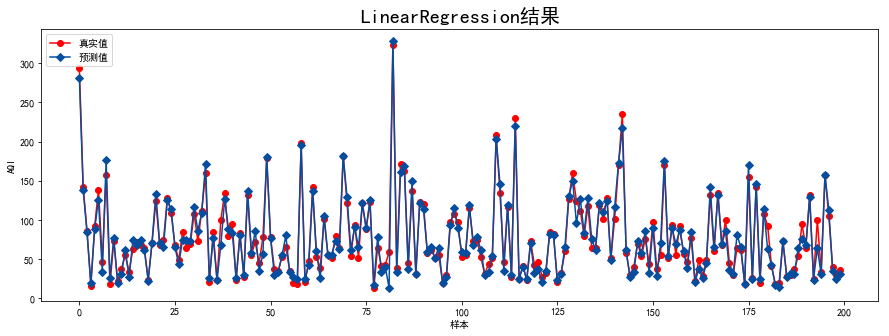

In [15]:
y_hat = reg.predict(x_test[:200])
plt.figure(figsize=(15,5))
plt.plot(y_test[:200].values,'-r', label='真实值', marker='o')
plt.plot(y_hat, color='#054E9F', label='预测值', marker='D')
plt.legend(loc='upper left')
plt.xlabel("样本")
plt.ylabel("AQI")
plt.title('LinearRegression结果',fontsize=20)
